C:\Users\Tshupsane\AppData\Local\Temp\ipykernel_4412\3609427299.py:19: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_melt['Date'] = pd.to_datetime(df_melt['Date'])
C:\Users\Tshupsane\AppData\Local\Temp\ipykernel_4412\3609427299.py:19: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_melt['Date'] = pd.to_datetime(df_melt['Date'])
C:\Users\Tshupsane\AppData\Local\Temp\ipykernel_4412\3609427299.py:19: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_melt['Date'] = pd.to_datetime(df_melt['Date'])


  Province      Country       Lat       Long       Date  Cases_confirmed  \
0      All  Afghanistan  33.93911  67.709953 2020-01-22                0   
1      All      Albania  41.15330  20.168300 2020-01-22                0   
2      All      Algeria  28.03390   1.659600 2020-01-22                0   
3      All      Andorra  42.50630   1.521800 2020-01-22                0   
4      All       Angola -11.20270  17.873900 2020-01-22                0   

   Cases_deaths  Cases_recovered  Active_Cases  
0             0                0             0  
1             0                0             0  
2             0                0             0  
3             0                0             0  
4             0                0             0  


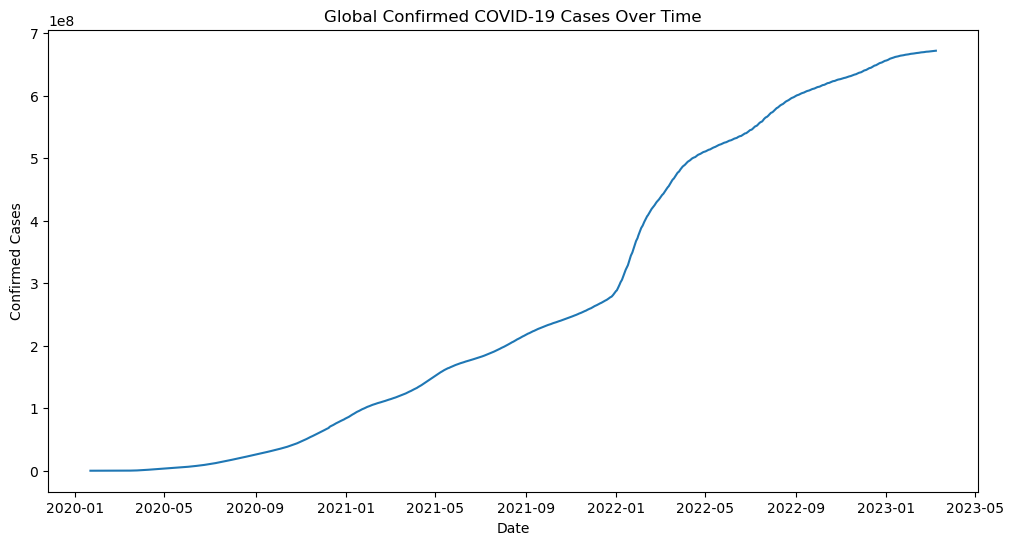

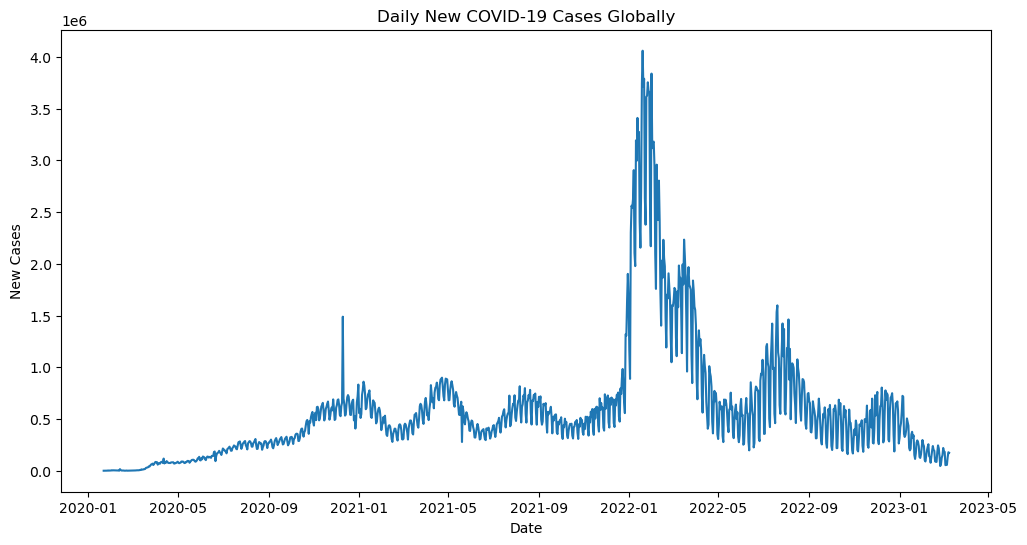

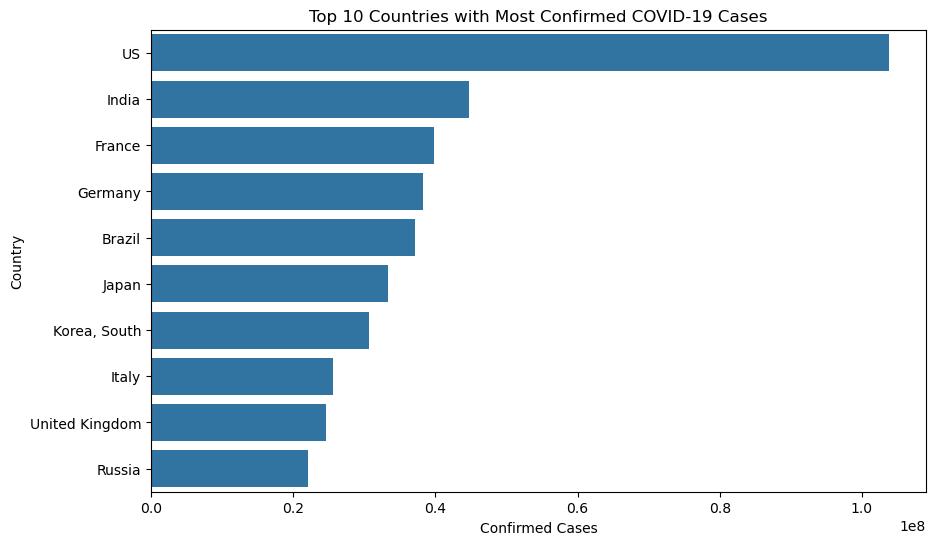

In [3]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Load COVID-19 data
confirmed_cases_url = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv"
deaths_cases_url = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv"
recovered_cases_url = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv"

confirmed_df = pd.read_csv(confirmed_cases_url)
deaths_df = pd.read_csv(deaths_cases_url)
recovered_df = pd.read_csv(recovered_cases_url)

# Data Preprocessing
def preprocess_data(df):
    df_melt = df.melt(id_vars=['Province/State', 'Country/Region', 'Lat', 'Long'], var_name='Date', value_name='Cases')
    df_melt['Date'] = pd.to_datetime(df_melt['Date'])
    df_melt = df_melt.rename(columns={'Country/Region': 'Country', 'Province/State': 'Province'})
    df_melt['Province'] = df_melt['Province'].fillna('All')
    return df_melt

confirmed_df_long = preprocess_data(confirmed_df)
deaths_df_long = preprocess_data(deaths_df)
recovered_df_long = preprocess_data(recovered_df)
recovered_df_long = recovered_df_long.rename(columns={'Cases': 'Cases_recovered'})

combined_df = pd.merge(confirmed_df_long, deaths_df_long, on=['Province', 'Country', 'Date', 'Lat', 'Long'], suffixes=('_confirmed', '_deaths'))
combined_df = pd.merge(combined_df, recovered_df_long, on=['Province', 'Country', 'Date', 'Lat', 'Long'])
combined_df['Active_Cases'] = combined_df['Cases_confirmed'] - combined_df['Cases_deaths'] - combined_df['Cases_recovered']

print(combined_df.head())

# Basic Data Analysis and Visualization
global_cases = combined_df.groupby('Date')['Cases_confirmed'].sum().reset_index()

plt.figure(figsize=(12, 6))
plt.plot(global_cases['Date'], global_cases['Cases_confirmed'])
plt.title('Global Confirmed COVID-19 Cases Over Time')
plt.xlabel('Date')
plt.ylabel('Confirmed Cases')
plt.show()

global_cases['New_Cases'] = global_cases['Cases_confirmed'].diff().fillna(0)

plt.figure(figsize=(12, 6))
plt.plot(global_cases['Date'], global_cases['New_Cases'])
plt.title('Daily New COVID-19 Cases Globally')
plt.xlabel('Date')
plt.ylabel('New Cases')
plt.show()

latest_data = combined_df[combined_df['Date'] == combined_df['Date'].max()]
top_10_countries = latest_data.groupby('Country')['Cases_confirmed'].sum().nlargest(10).reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='Cases_confirmed', y='Country', data=top_10_countries)
plt.title('Top 10 Countries with Most Confirmed COVID-19 Cases')
plt.xlabel('Confirmed Cases')
plt.ylabel('Country')
plt.show()

fig = px.choropleth(latest_data, locations="Country", locationmode="country names", color="Cases_confirmed", hover_name="Country", projection="natural earth", title="Confirmed COVID-19 Cases by Country", color_continuous_scale=px.colors.sequential.Plasma)
fig.show()
